In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
from google.colab import files
uploaded = files.upload()

Saving PIB nacional.xlsx to PIB nacional (1).xlsx


In [21]:
# Carga de datos
df_pib = pd.read_excel('PIB nacional.xlsx', engine='openpyxl')
#ipc = pd.read_excel('PIB nacional.xlsx', engine='openpyxl')

In [22]:
df_pib.rename(columns={'2021p':2021,
    '2022p':2022,
    '2023pr':2023}, inplace=True)
col = list(df_pib.columns)
años = range(2010, 2024)

## PIB Anual

In [23]:
#Creación de las columnas del PIB anual
for año in años:
    i = col.index(año)
    periodo = df_pib[col[i:i+4]]
    pib_total = periodo.sum(axis=1)
    df_pib[f'{año}_total'] = pib_total

In [24]:
df_pib.drop(index=0, inplace=True)

In [25]:
df_pib

,Clasificación Cuentas Nacionales,Secciones CIIU Rev. 4 A.C.\n12 agrupaciones,Concepto,2005,Unnamed: 4,Unnamed: 5,Unnamed: 6,2006,Unnamed: 8,Unnamed: 9,...,2014_total,2015_total,2016_total,2017_total,2018_total,2019_total,2020_total,2021_total,2022_total,2023_total
1,NaN,A,"Agricultura, ganadería, caza, silvicultura y p...",5852.045741,6229.23295,6793.193971,6564.527339,6079.541965,6503.019448,7554.045893,...,41555.0,48124.0,57065.0,58815.0,61497.0,67958.0,74970.0,92679.0,130439.0,137179.20147
2,NaN,B,Explotación de minas y canteras,4994.885509,5524.740505,5773.647495,5777.726492,5837.711751,6790.326265,7059.551868,...,64274.0,47627.0,40999.0,47538.0,57788.0,58317.0,40689.0,64235.0,106149.0,86547.531614
3,NaN,C,Industrias manufactureras,12200.232431,13465.851518,14066.544614,14310.371438,13208.609246,14574.232445,16325.581235,...,93603.0,99789.0,106226.0,105022.0,110157.0,115830.0,107111.0,133580.0,165302.0,171466.890539
4,NaN,D + E,"Suministro de electricidad, gas, vapor y aire ...",2851.712287,3019.260618,3171.322038,2992.705057,3115.518821,3251.987673,3502.679087,...,22947.0,24599.0,27624.0,29789.0,32616.0,36124.0,38850.0,44820.0,54990.0,66139.19611
5,NaN,F,Construcción,3534.180534,2922.358162,3455.471688,4502.989616,3816.360046,3601.373619,4503.409533,...,55568.0,58042.0,64325.0,64474.0,65110.0,65277.0,47384.0,50235.0,57873.0,61953.126659
6,NaN,G + H + I,Comercio al por mayor y al por menor; reparaci...,12601.711819,13377.430149,13938.841059,15000.016973,13901.88055,14796.585131,16110.891598,...,120677.0,135429.0,152684.0,163052.0,173708.0,188266.0,170072.0,216636.0,270821.0,295710.624184
7,NaN,J,Información y comunicaciones,2695.507568,2983.095048,2882.954622,3711.442762,3266.058552,3559.399648,3371.428781,...,23336.0,23961.0,25122.0,26821.0,28348.0,29381.0,28902.0,32341.0,36277.0,38251.703718
8,NaN,K,Actividades financieras y de seguros,2834.458667,2885.77897,3061.515563,3064.246801,3209.942626,3021.196693,3053.974106,...,31839.0,34696.0,34324.0,39060.0,42627.0,46984.0,48808.0,52653.0,56954.0,62285.356525
9,NaN,L,Actividades inmobiliarias,7921.782448,8053.850507,8186.506406,8393.860639,8682.371105,8882.079126,9065.220587,...,65194.0,69825.0,75645.0,80976.0,86825.0,92388.0,95042.0,98900.0,104739.0,113697.229063
10,NaN,M + N,"Actividades profesionales, científicas y técni...",3838.093286,3982.910815,4132.942976,4730.052923,4376.986446,4616.262121,4864.138246,...,55216.0,57392.0,59643.0,62898.0,67597.0,72458.0,69363.0,79121.0,93208.0,102736.063987


## Sectores que más aportan al PIB

In [83]:
def pib_sector(df_pib, año):
    total = df_pib[f'{año}_total'] #Columna del año
    pib_año = total[len(total)] #PIB anual
    proporcion_pib = total/pib_año #Proporciones de cuánto aporta cada sector
    proporcion_pib = proporcion_pib[:-3].sort_values(ascending=False) #Ordenar los sectores
    tres_sectores = list(proporcion_pib.head(3).index ) #Seleccionar los 3 que más aportan
    aportaciones = {}

    print('Año', año, '\nPIB Anual:', pib_año)
    print('Sectores que más aportaron al PIB')
    for i in range(1, 4):
      print(f'{i}. {df_pib["Concepto"][tres_sectores[i - 1]]}')
      print(f'\tPorcentaje: {proporcion_pib[tres_sectores[i - 1]]*100}%')
      aportaciones[df_pib["Concepto"][tres_sectores[i - 1]]] = proporcion_pib[tres_sectores[i - 1]]*100

    return aportaciones

In [84]:
aportaciones_lista = []

for año in años:
    aportaciones = pib_sector(df_pib, año)
    print('-'*40)
    # Agregar un diccionario a la lista con los resultados del año actual
    aportaciones_lista.append({'Año': año, **aportaciones})

# Convertir la lista en un dataframe
aportaciones_df = pd.DataFrame(aportaciones_lista)

Año 2010 
PIB Anual: 544060.0000000002
Sectores que más aportaron al PIB
1. Comercio al por mayor y al por menor; reparación de vehículos automotores y motocicletas; Transporte y almacenamiento; Alojamiento y servicios de comida
	Porcentaje: 15.609675403448135%
2. Industrias manufactureras
	Porcentaje: 13.967025695695378%
3. Administración pública y defensa; planes de seguridad social de afiliación obligatoria; Educación; Actividades de atención de la salud humana y de servicios sociales
	Porcentaje: 12.79638275190238%
----------------------------------------
Año 2011 
PIB Anual: 619022.9999999997
Sectores que más aportaron al PIB
1. Comercio al por mayor y al por menor; reparación de vehículos automotores y motocicletas; Transporte y almacenamiento; Alojamiento y servicios de comida
	Porcentaje: 15.027551480316495%
2. Industrias manufactureras
	Porcentaje: 13.217602576964055%
3. Administración pública y defensa; planes de seguridad social de afiliación obligatoria; Educación; Activida

In [85]:
aportaciones_df

,Año,Comercio al por mayor y al por menor; reparación de vehículos automotores y motocicletas; Transporte y almacenamiento; Alojamiento y servicios de comida,Industrias manufactureras,Administración pública y defensa; planes de seguridad social de afiliación obligatoria; Educación; Actividades de atención de la salud humana y de servicios sociales
0,2010,15.609675,13.967026,12.796383
1,2011,15.027551,13.217603,12.226040
2,2012,14.779740,13.089285,12.627624
3,2013,15.377129,12.662356,13.109637
4,2014,15.818132,12.269319,13.430148
5,2015,16.829918,12.400894,13.927938
6,2016,17.676219,12.297779,14.298862
7,2017,17.713975,11.409594,14.691935
8,2018,17.585501,11.151853,14.903659
9,2019,17.759804,10.926658,15.070920


In [86]:
def aporte_sectores(df, sector):
  plt.figure(figsize=(12, 6))
  plt.plot(df['Año'], df[sector], marker='o')
  plt.title(f'Aporte al PIB del sector {sectores_importantes[sector]}')
  plt.xlabel('Año')
  plt.ylabel('Aporte al PIB (%)')
  plt.xticks(años,rotation=90)
  plt.grid(True)
  plt.show()

In [87]:
sectores_importantes = list(aportaciones_df.columns)
sectores_importantes

['Año',
 'Comercio al por mayor y al por menor; reparación de vehículos automotores y motocicletas; Transporte y almacenamiento; Alojamiento y servicios de comida',
 'Industrias manufactureras',
 'Administración pública y defensa; planes de seguridad social de afiliación obligatoria; Educación; Actividades de atención de la salud humana y de servicios sociales']

In [88]:
sectores_importantes = {'Comercio al por mayor y al por menor; reparación de vehículos automotores y motocicletas; Transporte y almacenamiento; Alojamiento y servicios de comida':'Comercio al por mayor y al por menor',
                        'Industrias manufactureras': 'Industrias manufactureras',
                        'Administración pública y defensa; planes de seguridad social de afiliación obligatoria; Educación; Actividades de atención de la salud humana y de servicios sociales':'Administración pública y defensa'}

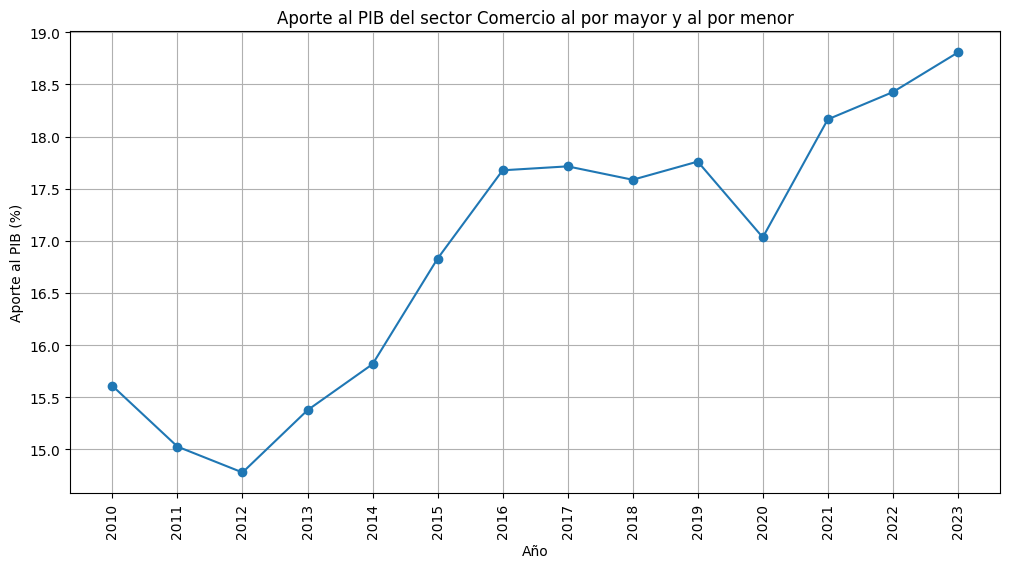

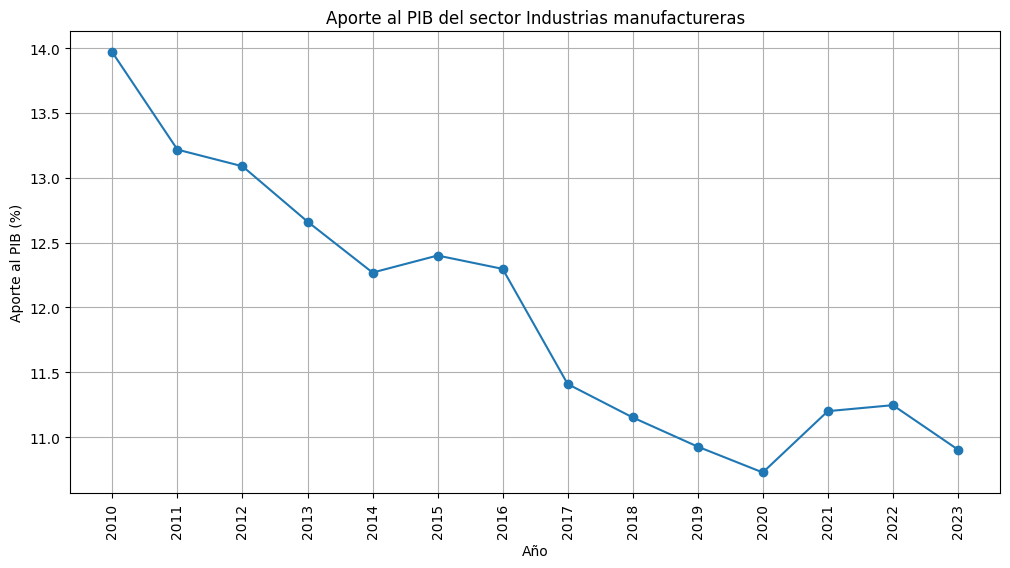

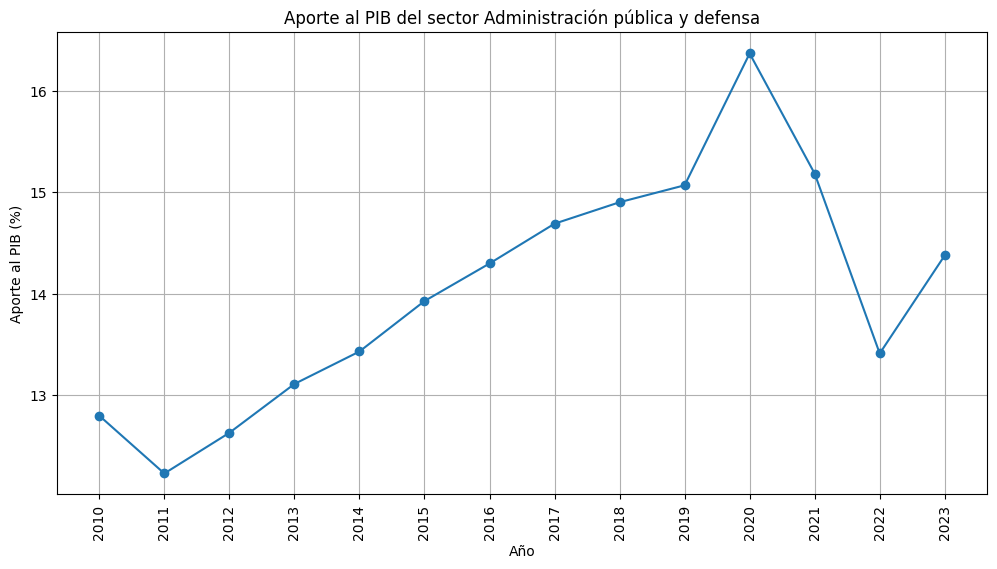

In [94]:
for sector in sectores_importantes.keys():
  aporte_sectores(aportaciones_df, sector)

## Crecimiento

In [60]:
def crecimiento_anual(df_pib, año, df_pib_crecimiento_anual):
  año_anterior = df_pib[f'{año-1}_total']
  año_referencia = df_pib[f'{año}_total']

  crecimiento = (año_referencia-año_anterior)*100/año_anterior
  df_pib_crecimiento_anual[f'{año}'] = crecimiento

  return df_pib_crecimiento_anual

In [61]:
df_pib_crecimiento_anual = pd.DataFrame()

In [62]:
for año in range(2011,2024):
  df_pib_crecimiento_anual = crecimiento_anual(df_pib, año, df_pib_crecimiento_anual)

In [96]:
df_pib_crecimiento_anual = df_pib_crecimiento_anual.set_index(df_pib['Concepto'])
df_pib_crecimiento_anual

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Concepto,,,,,,,,,,,,,
"Agricultura, ganadería, caza, silvicultura y pesca",9.584145,-1.325943,3.493778,7.909839,15.807965,18.579087,3.066678,4.560061,10.506204,10.318138,23.621449,40.742779,5.167321
Explotación de minas y canteras,49.767541,5.682656,-1.632308,-12.361603,-25.900053,-13.916476,15.949169,21.561698,0.915415,-30.227892,57.86822,65.251031,-18.465994
Industrias manufactureras,7.673479,6.625519,3.645075,3.519094,6.608763,6.450611,-1.133432,4.889452,5.149922,-7.527411,24.711748,23.747567,3.729471
"Suministro de electricidad, gas, vapor y aire acondicionado; Distribución de agua; evacuación y tratamiento de aguas residuales, gestión de desechos y actividades de saneamiento ambiental",8.473244,5.947821,6.351688,5.42105,7.199198,12.297248,7.837388,9.49008,10.755457,7.54623,15.366795,22.690763,20.274952
Construcción,15.737507,17.187047,19.648384,15.0,4.452203,10.82492,0.231636,0.986444,0.256489,-27.41088,6.016799,15.204539,7.050139
Comercio al por mayor y al por menor; reparación de vehículos automotores y motocicletas; Transporte y almacenamiento; Alojamiento y servicios de comida,9.53536,5.895253,11.470134,9.899187,12.224368,12.740993,6.790495,6.535338,8.380731,-9.663986,27.378992,25.012002,9.190434
Información y comunicaciones,5.599828,5.557822,6.714327,5.630998,2.678265,4.845374,6.762997,5.6933,3.643996,-1.630305,11.898831,12.17031,5.443404
Actividades financieras y de seguros,13.839035,13.039373,7.576363,7.495189,8.973272,-1.07217,13.797926,9.132104,10.221221,3.882173,7.877807,8.168575,9.360811
Actividades inmobiliarias,7.316381,7.48027,7.01588,7.012245,7.103414,8.335124,7.047392,7.223128,6.407141,2.872667,4.059258,5.903943,8.552907


In [100]:
def crecimiento_anual_sector(df_pib_crecimiento_anual, sector):
  plt.figure(figsize=(12, 6))
  plt.plot(df_pib_crecimiento_anual.columns, df_pib_crecimiento_anual.loc[sector], marker='o')
  plt.title(f'Crecimiento anual del PIB - {sectores_importantes[sector]}')
  plt.xlabel('Año')
  plt.ylabel('Crecimiento del PIB (%)')
  plt.xticks(rotation=90)
  plt.grid(True)
  plt.show()

In [101]:
sectores_importantes.update({'Producto interno bruto':'Producto interno bruto total'})

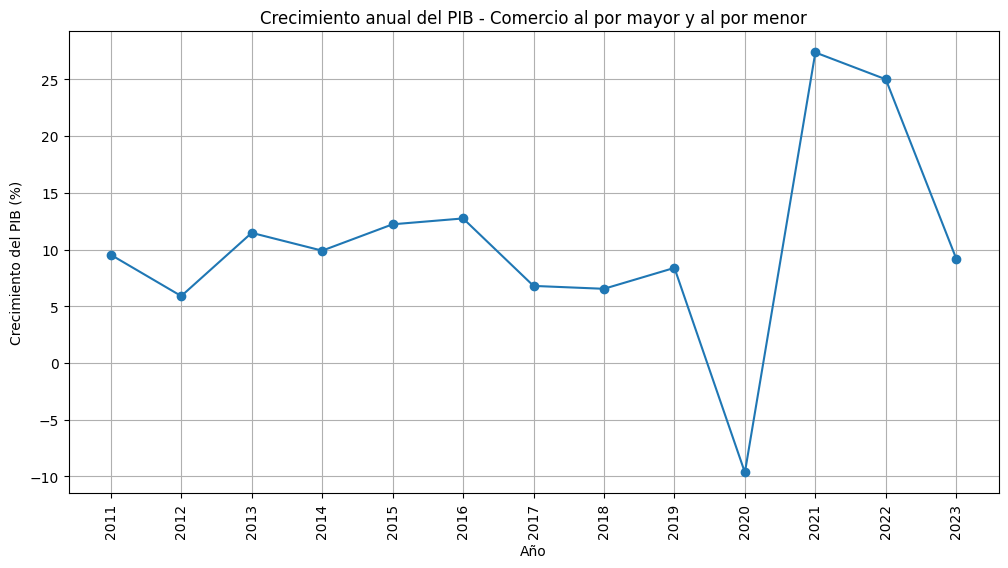

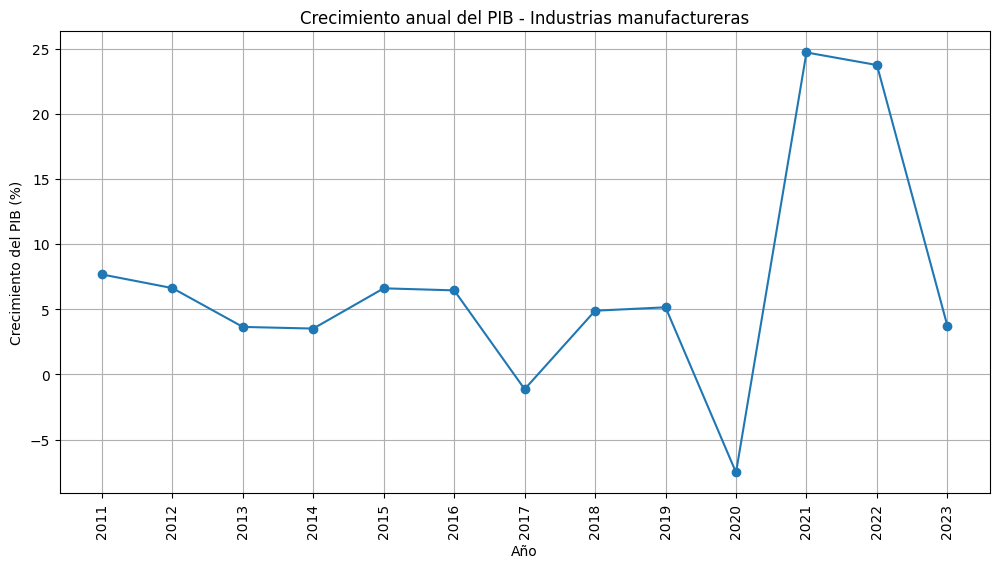

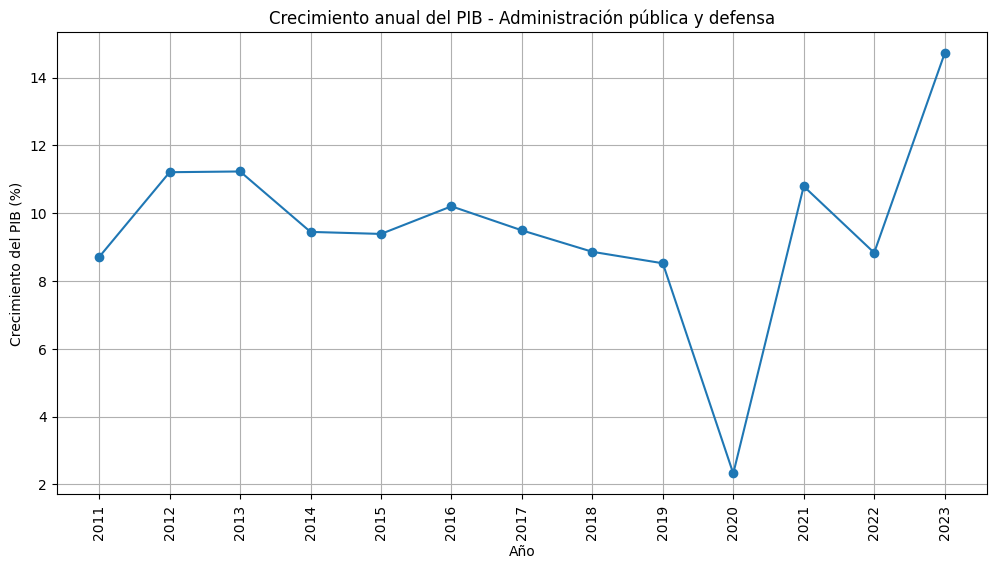

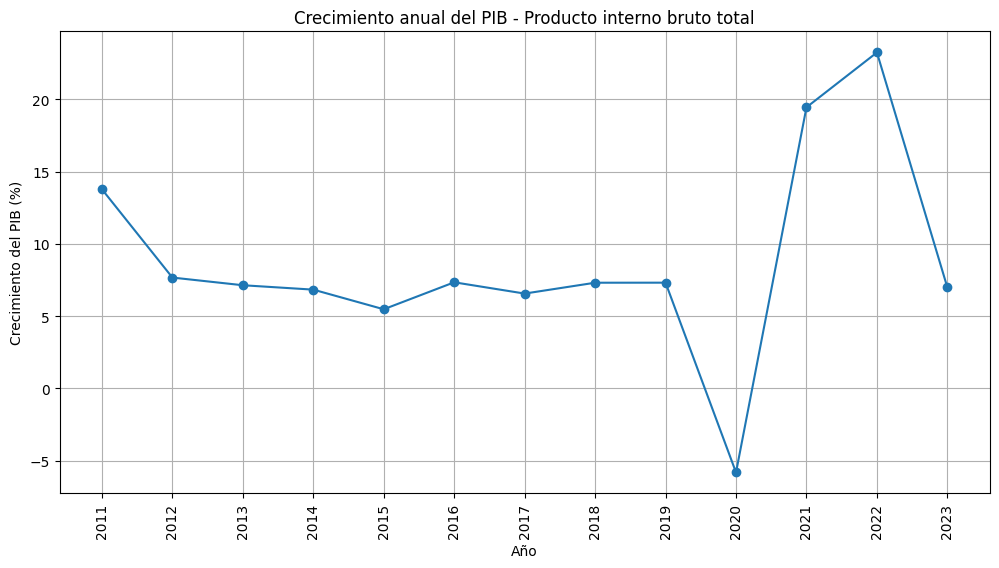

In [102]:
for sector in sectores_importantes.keys():
  crecimiento_anual_sector(df_pib_crecimiento_anual, sector)